# NLP

## Регулярные выражения

https://tproger.ru/translations/regular-expression-python

Грубо говоря, у нас есть input-поле, в которое должен вводиться email-адрес. Но пока мы не зададим проверку валидности введённого email-адреса, в этой строке может оказаться совершенно любой набор символов, а нам это не нужно.

Чтобы выявить ошибку при вводе некорректного адреса электронной почты, можно использовать следующее регулярное выражение:

r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+(?:\.[a-zA-Z0-9-]+)+$'

In [1]:
import re

# match
ищет по заданному шаблону в начале строки

In [2]:
result = re.match('ab+c.', 'abcdefghijkabcabc') # ищем по шаблону 'ab+c.' 
print (result) # совпадение найдено:

<re.Match object; span=(0, 4), match='abcd'>


In [3]:
print(result.group(0)) # выводим найденное совпадение

abcd


In [4]:
result = re.match('abc.', 'abdefghijkabcabc')
print(result) # совпадение не найдено

None


In [9]:
result = re.match(r'AV An', 'AV Analytics Vidhya AV')
print(result)

<re.Match object; span=(0, 5), match='AV An'>


In [10]:
print(result.group(0))

AV An


# search
ищет по всей строке, возвращает только первое найденное совпадение

In [19]:
result = re.search('ch+i...', 'aefgabchijkabcabc') 
print(result) 

<re.Match object; span=(6, 12), match='chijka'>


In [20]:
print(result.group(0)) # выводим найденное совпадение

chijka


# findall
возвращает список всех найденных совпадений

In [21]:
result = re.findall('ab+c.', 'abcdefghijkabcabcxabc') 
print(result)

['abcd', 'abca']


Вопросы: 
1) почему нет последнего abc?
2) почему нет abcx?

# split
разделяет строку по заданному шаблону


In [22]:
result = re.split(',', 'itsy, bitsy, teenie, weenie') 
print(result)

['itsy', ' bitsy', ' teenie', ' weenie']


In [24]:
result[3]

' weenie'

можно указать максимальное количество разбиений

In [25]:
result = re.split(',', 'itsy, bitsy, teenie, weenie', maxsplit = 2) 
print(result)

['itsy', ' bitsy', ' teenie, weenie']


# sub
ищет шаблон в строке и заменяет все совпадения на указанную подстроку

параметры: (pattern, repl, string)

In [26]:
result = re.sub('a', 'b', 'abcabc')
print (result)

bbcbbc


# compile
компилирует регулярное выражение в отдельный объект

In [27]:
# Пример: построение списка всех слов строки:
prog = re.compile('[А-Яа-яё\-]+')
prog.findall("Слова? Да, больше, ещё больше слов! Что-то ещё.")

['Слова', 'Да', 'больше', 'ещё', 'больше', 'слов', 'Что-то', 'ещё']

### Задача: классификация твитов по тональности

У нас есть датасет из твитов, про каждый указано, как он эмоционально окрашен: положительно или отрицательно. Задача: предсказывать эмоциональную окраску.

Классификацию по тональности используют в рекомендательных системах, чтобы понять, понравилось ли людям кафе, кино, etc.

Скачиваем куски датасета ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv).

In [28]:
# если у вас линукс / мак / collab или ещё какая-то среда, в которой работает wget, можно так:
#!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
#!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [30]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = pd.concat([negative, positive])

In [33]:
df.shape

(226834, 2)

In [31]:
df.tail()

text     label
114906  Спала в родительском доме, на своей кровати......  positive
114907  RT @jebesilofyt: Эх... Мы немного решили сокра...  positive
114908  Что происходит со мной, когда в эфире #proacti...  positive
114909  "Любимая,я подарю тебе эту звезду..." Имя како...  positive
114910  @Ma_che_rie посмотри #непытайтесьпокинутьомск ...  positive

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

## Baseline: классификация необработанных n-грамм

### Векторизаторы

In [35]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer

Что такое n-граммы:

In [36]:
from nltk import ngrams

In [37]:
sent = 'Если б мне платили каждый раз'.split()
list(ngrams(sent, 1)) # униграммы

[('Если',), ('б',), ('мне',), ('платили',), ('каждый',), ('раз',)]

In [38]:
list(ngrams(sent, 2)) # биграммы

[('Если', 'б'),
 ('б', 'мне'),
 ('мне', 'платили'),
 ('платили', 'каждый'),
 ('каждый', 'раз')]

In [39]:
list(ngrams(sent, 3)) # триграммы

[('Если', 'б', 'мне'),
 ('б', 'мне', 'платили'),
 ('мне', 'платили', 'каждый'),
 ('платили', 'каждый', 'раз')]

In [40]:
list(ngrams(sent, 5)) # ... пентаграммы?

[('Если', 'б', 'мне', 'платили', 'каждый'),
 ('б', 'мне', 'платили', 'каждый', 'раз')]

Самый простой способ извлечь фичи из текстовых данных -- векторизаторы: `CountVectorizer` и `TfidfVectorizer`

Объект `CountVectorizer` делает простую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

In [41]:
vec = CountVectorizer(ngram_range = (1, 1))
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

In [49]:
x_train[1000]

1000    Дим, ты помогаешь мне, я тебе, все взаимно, вс...
1000         И как я встану сегодня утром на Тренеровку:(
Name: text, dtype: object

In [50]:
bow

<170125x243611 sparse matrix of type '<class 'numpy.int64'>'
	with 1848254 stored elements in Compressed Sparse Row format>

ngram_range отвечает за то, какие n-граммы мы используем в качестве фичей:<br/>
ngram_range=(1, 1) -- униграммы<br/>
ngram_range=(3, 3) -- триграммы<br/>
ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

В vec.vocabulary_ лежит словарь: мэппинг слов к их индексам:

In [51]:
list(vec.vocabulary_.items())[:10]

[('впервые', 114730),
 ('недовольна', 165666),
 ('походом', 191059),
 ('театр', 220526),
 ('пошлая', 191407),
 ('постановка', 190165),
 ('для', 125968),
 ('тех', 221385),
 ('кому', 146815),
 ('за', 132103)]

In [52]:
clf = LogisticRegression(random_state = 42)
clf.fit(bow, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [53]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.76      0.76      0.76     27994
    positive       0.76      0.76      0.76     28715

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



Попробуем сделать то же самое для триграмм:

In [54]:
vec = CountVectorizer(ngram_range = (3, 3))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state = 42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.47      0.71      0.57     18428
    positive       0.82      0.61      0.70     38281

    accuracy                           0.65     56709
   macro avg       0.64      0.66      0.63     56709
weighted avg       0.70      0.65      0.66     56709



(как вы думаете, почему в результатах теперь такой разброс по сравнению с униграммами?)

## TF-IDF векторизация

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений – tf-idf каждого слова.

Как считается tf-idf:

TF (term frequency) – относительная частотность слова в документе:
$$ TF(t,d) = \frac{n_t}{\sum_k n_k} $$

`t` -- слово (term), `d` -- документ, $n_t$ -- количество вхождений слова, $n_k$ -- количество вхождений остальных слов

IDF (inverse document frequency) – обратная частота документов, в которых есть это слово:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

`t` -- слово (term), `D` -- коллекция документов

Перемножаем их:
$$TFIDF_(t,d,D) = TF(t,d) \times IDF(i, D)$$

Сакральный смысл – если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом 
количестве документов, у него высокий TF-IDF.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.73      0.76      0.75     26687
    positive       0.78      0.75      0.76     30022

    accuracy                           0.75     56709
   macro avg       0.75      0.76      0.75     56709
weighted avg       0.76      0.75      0.76     56709



В этот раз получилось хуже :( Вернёмся к `CountVectorizer`.

## Токенизация

Токенизировать -- значит, поделить текст на слова, или *токены*.

Самый наивный способ токенизировать текст -- разделить с помощью `split`. Но `split` упускает очень много всего, например, банально не отделяет пунктуацию от слов. Кроме этого, есть ещё много менее тривиальных проблем. Поэтому лучше использовать готовые токенизаторы.

In [57]:
from nltk.tokenize import word_tokenize

В nltk вообще есть довольно много токенизаторов:

In [58]:
from nltk import tokenize
dir(tokenize)[:16]

['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer',
 'PunktSentenceTokenizer',
 'PunktTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer']

Они умеют выдавать индексы начала и конца каждого токена:

In [63]:
tokenize.TreebankWordTokenizer().tokenize("don't stop me")

['do', "n't", 'stop', 'me']

А некоторые -- вообще не для текста на естественном языке (не очень понятно, зачем это в nltk :)):

In [64]:
tokenize.SExprTokenizer().tokenize("(a (b c)) d e (f)")

['(a (b c))', 'd', 'e', '(f)']

## Стоп-слова и пунктуация

*Стоп-слова* -- это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе, то есть играют роль шума. Поэтому их принято убирать. По той же причине убирают и пунктуацию.

In [65]:
# у вас здесь, вероятно, выскочит ошибка и надо будет загрузить стоп слова (в тексте ошибки написано, как)
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [66]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [67]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [68]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
noise = stopwords.words('russian') + list(punctuation)

In [70]:
noise

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

## Лемматизация

Лемматизация – это сведение разных форм одного слова к начальной форме – *лемме*. Почему это хорошо?
* Во-первых, мы хотим рассматривать как отдельную фичу каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лематизации выкидываем мы только её.

Для русского есть два хороших лемматизатора: mystem и pymorphy:

### [Mystem](https://tech.yandex.ru/mystem/)
Как с ним работать:
* можно скачать mystem и запускать [из терминала с разными параметрами](https://yandex.ru/dev/mystem/?ysclid=m83e8gkero153283053)
* [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) - обертка для питона, работает медленнее, но это удобно

In [71]:
#!pip install pymystem3

In [72]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

Мы инициализировали Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin - путь к `mystem`, если их несколько
* grammar_info - нужна ли грамматическая информация или только леммы (по дефолту нужна)
* disambiguation - нужно ли снятие омонимии - дизамбигуация (по дефолту нужна)
* entire_input - нужно ли сохранять в выводе все (пробелы всякие, например), или можно выкинуть (по дефолту оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно, конечно, и пословно анализировать, но тогда он не сможет учитывать контекст.

Можно просто лемматизировать текст:

In [ ]:
print(mystem_analyzer.lemmatize(example))

А можно получить грамматическую информацию:

In [ ]:
mystem_analyzer.analyze(example)

In [74]:
import re
def my_preproc(text):
    text = re.sub('[{}]'.format(punctuation), '', text)
    text = mystem_analyzer.lemmatize(text)
    return [word for word in text if word not in stopwords.words('russian') + [' ', '\n']]

# Word2Vec


In [75]:
from gensim.test.utils import common_texts #предоставляет инструменты для анализа текстовых данных, включая создание векторных представлений слов, моделирование тем и другие методы обработки текста
from gensim.models import Word2Vec

In [76]:
help(common_texts)

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

In [77]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [78]:
skipgram = 1 # Этот параметр указывает, что мы хотим использовать модель Skip-gram для обучения векторных представлений слов. Если бы это значение было 0, использовалась бы модель Continuous Bag of Words (CBOW).
negative_sampling = 5 #Этот параметр задает количество отрицательных примеров, которые будут использоваться для обучения модели. В данном случае для каждого положительного примера будет 5 отрицательных.
w2v_model = Word2Vec(sentences = common_texts, #Модель будет обучена на наборе данных common_texts, который мы импортировали ранее из библиотеки Gensim
                     vector_size = 100, #Указывает размерность векторных представлений слов. В данном случае каждое слово будет представлено вектором размером 100
                     window = 5, #Определяет размер окна контекста. Это означает, что при обучении модели будут учитываться 5 слов слева и 5 слов справа от целевого слова
                     min_count = 1, #Этот параметр указывает, что слова, встречающиеся реже 1 раза, будут игнорироваться. В данном случае все слова будут включены в модель, так как минимальная частота равна 1
                     workers = 4, #Определяет количество потоков, которые будут использоваться для обучения модели. В данном случае модель будет использовать 4 потока для ускорения процесса обучения
                     sg = skipgram, #Указывает, какую модель использовать для обучения. Если skipgram равно 1, будет использоваться модель Skip-gram, если 0 — модель CBOW.
                     negative = negative_sampling) #Указывает количество отрицательных выборок для каждого положительного примера

w2v_model.save("word2vec.model") #Этот метод сохраняет обученную модель в файл с именем "word2vec.model". Это позволяет впоследствии загрузить модель и использовать её без повторного обучения

In [79]:
vector = w2v_model.wv['computer']  # Здесь мы используем модель w2v_model, чтобы получить вектор, представляющий слово "computer".
vector

array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428459,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.0044876 ,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811905, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

In [80]:
vector.shape

(100,)

In [82]:
w2v_model.wv['human']

array([ 9.7702928e-03,  8.1651136e-03,  1.2809718e-03,  5.0975787e-03,
        1.4081288e-03, -6.4551616e-03, -1.4280510e-03,  6.4491653e-03,
       -4.6173059e-03, -3.9930656e-03,  4.9244044e-03,  2.7130984e-03,
       -1.8479753e-03, -2.8769434e-03,  6.0107317e-03, -5.7167388e-03,
       -3.2367026e-03, -6.4878250e-03, -4.2346325e-03, -8.5809948e-03,
       -4.4697891e-03, -8.5112294e-03,  1.4037776e-03, -8.6181965e-03,
       -9.9166557e-03, -8.2016252e-03, -6.7726658e-03,  6.6805850e-03,
        3.7845564e-03,  3.5616636e-04, -2.9579818e-03, -7.4283206e-03,
        5.3341867e-04,  4.9989222e-04,  1.9561886e-04,  8.5259555e-04,
        7.8633073e-04, -6.8160298e-05, -8.0070542e-03, -5.8702733e-03,
       -8.3829118e-03, -1.3120425e-03,  1.8206370e-03,  7.4171280e-03,
       -1.9634271e-03, -2.3252917e-03,  9.4871549e-03,  7.9704521e-05,
       -2.4045217e-03,  8.6048469e-03,  2.6870037e-03, -5.3439722e-03,
        6.5881060e-03,  4.5101536e-03, -7.0544672e-03, -3.2317400e-04,
      

In [83]:
sims = w2v_model.wv.most_similar('computer', topn = 10)  # Метод most_similar возвращает список кортежей, каждый из которых содержит слово и его схожесть (или косинусное расстояние) с заданным словом. Параметр topn=10 указывает, что мы хотим получить 10 наиболее похожих слов
sims

[('system', 0.21617141366004944),
 ('survey', 0.04468922317028046),
 ('interface', 0.015203384682536125),
 ('time', 0.0019510771380737424),
 ('trees', -0.03284314274787903),
 ('human', -0.07424270361661911),
 ('response', -0.09324456751346588),
 ('graph', -0.09575342386960983),
 ('eps', -0.10513808578252792),
 ('user', -0.1690933257341385)]

In [84]:
w2v_model

In [85]:
w2v_model.wv['human'].shape #используется для получения формы (размерности) вектора, представляющего слово "human" в модели Word2Vec

(100,)

In [86]:
w2v_model.wv['human']

array([ 9.7702928e-03,  8.1651136e-03,  1.2809718e-03,  5.0975787e-03,
        1.4081288e-03, -6.4551616e-03, -1.4280510e-03,  6.4491653e-03,
       -4.6173059e-03, -3.9930656e-03,  4.9244044e-03,  2.7130984e-03,
       -1.8479753e-03, -2.8769434e-03,  6.0107317e-03, -5.7167388e-03,
       -3.2367026e-03, -6.4878250e-03, -4.2346325e-03, -8.5809948e-03,
       -4.4697891e-03, -8.5112294e-03,  1.4037776e-03, -8.6181965e-03,
       -9.9166557e-03, -8.2016252e-03, -6.7726658e-03,  6.6805850e-03,
        3.7845564e-03,  3.5616636e-04, -2.9579818e-03, -7.4283206e-03,
        5.3341867e-04,  4.9989222e-04,  1.9561886e-04,  8.5259555e-04,
        7.8633073e-04, -6.8160298e-05, -8.0070542e-03, -5.8702733e-03,
       -8.3829118e-03, -1.3120425e-03,  1.8206370e-03,  7.4171280e-03,
       -1.9634271e-03, -2.3252917e-03,  9.4871549e-03,  7.9704521e-05,
       -2.4045217e-03,  8.6048469e-03,  2.6870037e-03, -5.3439722e-03,
        6.5881060e-03,  4.5101536e-03, -7.0544672e-03, -3.2317400e-04,
      

In [87]:
result = w2v_model.wv.most_similar(positive = ['human', 'system'], negative = ['computer'], topn = 1) 

'''
используется метод most_similar для получения слов, 
которые наиболее похожи на комбинацию слов "human" и "system", 
при этом исключая слово "computer".

positive=['human', 'system']: Это список слов, которые мы хотим учесть при поиске схожих слов. В данном случае мы ищем слова, которые похожи на оба слова "human" и "system".
negative=['computer']: Это слово, которое мы хотим исключить из результатов. То есть, 
мы ищем слова, которые похожи на "human" и "system", но не похожи на "computer".
topn = 1: Указывает, что мы хотим получить только одно слово, наиболее похожее на заданную комбинацию.
'''

print(result)

[('response', 0.17535406351089478)]


In [88]:
w2v_model.wv.most_similar(positive = ['human', 'system'], negative = ['computer'], topn = 5)

[('response', 0.17535406351089478),
 ('eps', 0.125144824385643),
 ('interface', 0.09263758361339569),
 ('trees', 0.09036029130220413),
 ('minors', 0.08231795579195023)]

In [89]:
result = w2v_model.wv.most_similar(positive = ['human', 'system'], negative = ['trees'], topn = 1) 
print(result)

[('interface', 0.16055169701576233)]


In [90]:
w2v_model.wv.most_similar(positive = ['trees'], negative = ['survey'], topn = 5)

[('minors', 0.1889941543340683),
 ('response', 0.11202939599752426),
 ('time', 0.10834681987762451),
 ('human', 0.10668007284402847),
 ('eps', 0.00276385061442852)]

### Предобученные эмбеддинги

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
#!unzip glove.6B.zip

In [91]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec('glove.6B.100d.txt', 'glove.6B.100d.txt.word2vec') #для преобразования модели GloVe (Global Vectors for Word Representation) в формат, совместимый с библиотекой Gensim, который позволяет загружать и использовать векторные представления слов. 

/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_74801/1259735528.py:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec('glove.6B.100d.txt', 'glove.6B.100d.txt.word2vec') #для преобразования модели GloVe (Global Vectors for Word Representation) в формат, совместимый с библиотекой Gensim, который позволяет загружать и использовать векторные представления слов.


(400000, 100)

In [92]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec' #путь к файлу, в котором сохранены векторные представления слов в формате Word2Vec.
glove_model = KeyedVectors.load_word2vec_format(filename, binary = False) #Загружает модель из указанного файла. Параметр binary=False указывает, что файл не в двоичном формате, а в текстовом.
# calculate: (king - man) + woman = ?
result = glove_model.most_similar(positive = ['woman', 'king'], negative = ['man'], topn = 1)

'''
Вычисляем вектор, который получается из выражения (king−man)+woman.
positive=['woman', 'king']: Это список слов, которые мы хотим учесть при вычислении. Мы ищем слова, которые семантически похожи на "woman" и "king".
negative=['man']: Это слово, которое мы хотим исключить из результата. Мы ищем слова, которые похожи на "king" и "woman", но не похожи на "man".
topn=1: Указывает, что мы хотим получить только одно слово, наиболее похожее на результат.
'''

print(result)

[('queen', 0.7698541283607483)]


In [93]:
glove_model.most_similar(positive = ['woman', 'king'], negative = ['man'], topn = 1)

[('queen', 0.7698541283607483)]

In [94]:
glove_model.most_similar(positive = ['car', 'bicycle'], topn = 1)

[('motorcycle', 0.8456250429153442)]

In [95]:
glove_model.most_similar(positive = ['car', 'bicycle'], negative = ['motorcycle'], topn = 1)

[('bus', 0.7515897154808044)]

In [96]:
glove_model.most_similar(positive = ['woman', 'king'], 
                         negative = ['crown'], topn = 1)

[('mother', 0.7773604989051819)]

In [97]:
glove_model.most_similar(positive = ['woman', 'cat'], 
                         negative = ['animal'], topn = 1)

[('girl', 0.7711177468299866)]

In [98]:
glove_model.most_similar(positive = ['dog', 'cat'], 
                         negative = ['animal'], topn = 1)

[('puppy', 0.6911072731018066)]

In [99]:
glove_model.most_similar(positive = ['house', 'trees'], 
                         negative = ['human'], topn = 1)

[('bushes', 0.6633507013320923)]

In [100]:
glove_model.most_similar(positive = ['rock'], 
                         negative = ['music'], topn = 1)

[('outcropping', 0.5520431399345398)]

In [103]:
glove_model.most_similar(positive = ['rock', 'guitar'], topn = 1)

[('band', 0.8304225206375122)]

In [104]:
glove_model.most_similar(positive = ['rock', 'guitar'], 
                         negative = ['music', 'woman'], topn = 1)

[('guitars', 0.5721947550773621)]

In [105]:
glove_model.most_similar(positive = ['rock', 'guitar', 'woman'], 
                         negative = ['music'], topn = 1)

[('man', 0.7345726490020752)]

# [FastText](https://github.com/facebookresearch/fastText)

[supervised-tutorial](https://fasttext.cc/docs/en/supervised-tutorial.html)

[unsupervised-tutorial](https://fasttext.cc/docs/en/unsupervised-tutorial.html)

[help](https://fasttext.cc/docs/en/python-module.html)

[python reimplementation](http://christopher5106.github.io/deep/learning/2020/04/02/fasttext_pretrained_embeddings_subword_word_representations.html)

```
word_emb = word_emb + sum( subword_embeddings )
```

In [113]:
#Проверим OOV
w2v_model.wv['abracadabra']

KeyError: "Key 'abracadabra' not present"

In [114]:
!wget https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz && tar xvzf cooking.stackexchange.tar.gz

--2025-03-10 21:50:07--  https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.222.236.115, 52.222.236.74, 52.222.236.65, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.222.236.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457609 (447K) [application/x-tar]
Saving to: ‘cooking.stackexchange.tar.gz.1’

cooking.stackexchan 100%[===================>] 446.88K  2.04MB/s    in 0.2s    

2025-03-10 21:50:08 (2.04 MB/s) - ‘cooking.stackexchange.tar.gz.1’ saved [457609/457609]

x cooking.stackexchange.id
x cooking.stackexchange.txt
x readme.txt


In [115]:
! head cooking.stackexchange.txt

__label__sauce __label__cheese How much does potato starch affect a cheese sauce recipe?
__label__food-safety __label__acidity Dangerous pathogens capable of growing in acidic environments
__label__cast-iron __label__stove How do I cover up the white spots on my cast iron stove?
__label__restaurant Michelin Three Star Restaurant; but if the chef is not there
__label__knife-skills __label__dicing Without knife skills, how can I quickly and accurately dice vegetables?
__label__storage-method __label__equipment __label__bread What's the purpose of a bread box?
__label__baking __label__food-safety __label__substitutions __label__peanuts how to seperate peanut oil from roasted peanuts at home?
__label__chocolate American equivalent for British chocolate terms
__label__baking __label__oven __label__convection Fan bake vs bake
__label__sauce __label__storage-lifetime __label__acidity __label__mayonnaise Regulation and balancing of readymade packed mayonnaise and other sauces


In [116]:
! head -n 12404 cooking.stackexchange.txt > cooking.train
! tail -n 3000 cooking.stackexchange.txt > cooking.valid

In [117]:
#!pip install fasttext

In [118]:
import fasttext

ft_model = fasttext.train_supervised(input = "cooking.train", minn = 3, maxn = 6, dim = 100)

'''
функция из библиотеки FastText, которая используется для обучения модели на размеченных данных. 
input="cooking.train": Указывает файл, содержащий обучающие данные. Ожидается, что данные размечены, то есть каждая строка должна начинаться с метки класса (например, __label__positive), за которой следует текст.
minn=3: Минимальная длина подслов (n-грамм), которые будут использоваться при обучении. Здесь мы указываем, что будем учитывать подслова длиной не менее 3 символов. Это может помочь в работе с редкими словами или опечатками.
maxn=6: Максимальная длина подслов (n-грамм). В данном случае мы учитываем подслова длиной до 6 символов. Это позволяет извлекать информацию из различных частей слов.
dim=100: Размерность векторов слов. Здесь мы указываем, что каждое слово будет представлено вектором размерностью 100. Это позволяет модели представлять слова в многомерном пространстве, что может улучшить качество классификации.
'''

Read 0M words
Number of words:  14543
Number of labels: 735
Progress: 100.0% words/sec/thread:   57131 lr:  0.000000 avg.loss: 17.706287 ETA:   0h 0m 0s


'\nфункция из библиотеки FastText, которая используется для обучения модели на размеченных данных. \ninput="cooking.train": Указывает файл, содержащий обучающие данные. Ожидается, что данные размечены, то есть каждая строка должна начинаться с метки класса (например, __label__positive), за которой следует текст.\nminn=3: Минимальная длина подслов (n-грамм), которые будут использоваться при обучении. Здесь мы указываем, что будем учитывать подслова длиной не менее 3 символов. Это может помочь в работе с редкими словами или опечатками.\nmaxn=6: Максимальная длина подслов (n-грамм). В данном случае мы учитываем подслова длиной до 6 символов. Это позволяет извлекать информацию из различных частей слов.\ndim=100: Размерность векторов слов. Здесь мы указываем, что каждое слово будет представлено вектором размерностью 100. Это позволяет модели представлять слова в многомерном пространстве, что может улучшить качество классификации.\n'

In [119]:
ft_model.predict("Which baking dish is best to bake a banana bread ?") #хотим узнать, к какому классу относится вопрос о лучшем блюде для выпекания бананового хлеба.

(('__label__baking',), array([0.00234059]))

предсказанная метка класса, которая указывает, что текст, скорее всего, относится к категории "выпечка" (или подобной).
array([0.95]): Это вероятность или уверенность модели в том, что текст действительно относится к этому классу. Значение 0.95 указывает на высокую степень уверенности в предсказании.

In [120]:
ft_model.test("cooking.valid") # N, P@1, R@1 возвращает различные метрики, такие как точность (precision), полнота (recall)

(3000, 0.096, 0.04151650569410408)

In [121]:
!grep -c abracadabra cooking.train

0


In [122]:
!grep -c dab cooking.train

5


In [123]:
ft_model['dab'] #для получения векторного представления слова "dab" из обученной модели FastText

array([ 0.00241528,  0.00011075, -0.00344657,  0.00193653, -0.00238883,
        0.00753212,  0.00127734,  0.00226638, -0.0001921 ,  0.00028715,
       -0.00270718,  0.00253145, -0.00068597,  0.00084609,  0.00094201,
       -0.00038019,  0.0011821 ,  0.00100929, -0.00094331, -0.001145  ,
        0.00108136, -0.00041254, -0.00075946,  0.00332045,  0.00158646,
       -0.00181916,  0.00245557,  0.0002749 , -0.00037654,  0.00104468,
       -0.00295334,  0.00098996,  0.00195894,  0.00014739, -0.0010598 ,
        0.000339  , -0.00178733, -0.00351899, -0.00063939,  0.00332984,
       -0.00225978, -0.00223477,  0.00193415,  0.00169285, -0.00166854,
       -0.00068177,  0.000603  ,  0.00376054, -0.00038313, -0.00349011,
       -0.00358377, -0.00152836,  0.00058225, -0.00247342,  0.00012714,
       -0.00171258,  0.00075425, -0.00126473, -0.00089008, -0.00154104,
        0.00237972,  0.00776135, -0.00275523, -0.00468802, -0.00090628,
        0.00206848, -0.00102436,  0.0003075 , -0.00273707, -0.00

In [124]:
ft_model['dab'].shape

(100,)

In [125]:
ft_model['bra']

array([-0.00058729,  0.00801541,  0.00175325, -0.00054688, -0.00056295,
        0.00150915,  0.00373238,  0.00173439, -0.00150119, -0.00433631,
       -0.01025561,  0.00408587,  0.00096795,  0.00730789, -0.00578626,
       -0.00493016,  0.00147616, -0.00456403, -0.00061496, -0.0068842 ,
        0.0005822 ,  0.00608527, -0.00522345, -0.00173671, -0.00406188,
       -0.00708255,  0.01084005, -0.00249864, -0.00326958,  0.00744343,
       -0.01566453, -0.00564552, -0.00258505, -0.00826659, -0.00697535,
        0.00282978, -0.00159634, -0.00821917, -0.00124766, -0.00127879,
       -0.00173755, -0.00318517,  0.01049074, -0.00066838, -0.00251072,
       -0.00013481,  0.01274682, -0.0023669 , -0.00925872, -0.00427883,
       -0.00553639,  0.01003629, -0.0005701 ,  0.00036826,  0.00423464,
       -0.00025239, -0.0107419 , -0.01304134,  0.00049763, -0.00444198,
       -0.00044602,  0.00029972, -0.00029685, -0.00092989,  0.00357121,
        0.00171814, -0.00551132,  0.00810732, -0.00097486,  0.00

In [127]:
ft_model.get_words()[:100] #используется для получения списка всех слов, на которых была обучена модель FastText, и извлечения первых десяти из них

['</s>',
 'to',
 'a',
 'the',
 'How',
 'I',
 'in',
 'of',
 'for',
 'What',
 'is',
 'and',
 'do',
 'can',
 'with',
 'my',
 'Why',
 'make',
 'Is',
 'it',
 'Can',
 'be',
 'or',
 'from',
 'when',
 'you',
 'on',
 'use',
 'are',
 'does',
 'that',
 'should',
 'chicken',
 'there',
 'long',
 'without',
 'cooking',
 'cook',
 'bread',
 'an',
 '-',
 'between',
 'Does',
 'way',
 'at',
 'food',
 'substitute',
 'meat',
 'as',
 'how',
 'out',
 'oil',
 'safe',
 'have',
 'after',
 'get',
 'cream',
 'this',
 'making',
 'sauce',
 'difference',
 'baking',
 'recipe',
 'not',
 'cake',
 'Are',
 'milk',
 'what',
 'if',
 'used',
 'water',
 'chocolate',
 'oven',
 'best',
 'rice',
 'using',
 'dough',
 'store',
 'before',
 'keep',
 'good',
 'temperature',
 "What's",
 'much',
 'sugar',
 'butter',
 'pan',
 'Do',
 'cheese',
 'cooked',
 'taste',
 'frozen',
 'beef',
 'need',
 'salt',
 'flour',
 'fresh',
 'Should',
 'eggs',
 'too']

In [128]:
ft_model.get_subwords("abracadabra")

(['<ab',
  '<abr',
  '<abra',
  '<abrac',
  'abr',
  'abra',
  'abrac',
  'abraca',
  'bra',
  'brac',
  'braca',
  'bracad',
  'rac',
  'raca',
  'racad',
  'racada',
  'aca',
  'acad',
  'acada',
  'acadab',
  'cad',
  'cada',
  'cadab',
  'cadabr',
  'ada',
  'adab',
  'adabr',
  'adabra',
  'dab',
  'dabr',
  'dabra',
  'dabra>',
  'abr',
  'abra',
  'abra>',
  'bra',
  'bra>',
  'ra>'],
 array([ 224051,  725489, 1353288,  435133,  599159,  974266, 1098983,
         864970,   77835,  937436, 1164499,  324207,  356924, 1794739,
        1431503,  437506,  631491, 1342847,  853586, 1335810,  828966,
         356177,  853615, 1596005, 1277706, 1647850, 1036698, 1568237,
         293931,  827321, 1215264,  353548,  599159,  974266, 2008350,
          77835,  618869, 1005653]))

ing, er, 

In [129]:
ft_model.get_word_vector("abracadabra")

array([ 9.7161159e-05, -3.1949370e-04,  1.1811299e-03, -2.7637716e-04,
       -5.2049122e-04,  1.4715745e-03,  1.3299146e-03,  1.1960274e-03,
       -4.3339949e-04, -9.9536974e-04, -2.5000905e-03, -5.4808229e-04,
        1.3905544e-03, -5.7053537e-04,  8.8302058e-04, -8.6783705e-04,
        2.3200640e-03,  1.2635442e-03,  7.7013770e-04,  1.1619733e-03,
        1.2642660e-03, -1.7137657e-03, -3.3611551e-04,  6.0025312e-04,
        1.0662315e-03, -1.1609019e-03, -5.6642159e-05, -1.2295574e-03,
        5.0579163e-04,  1.6264323e-05,  6.7947432e-04, -1.0900268e-03,
       -4.3482374e-04,  2.3288153e-04, -3.3750859e-04,  1.0330232e-04,
        6.3698455e-05, -2.1360964e-03,  1.3750534e-03,  1.9271513e-03,
        3.9840743e-04, -6.3452476e-06,  8.9133426e-04, -1.5757566e-03,
        1.1771508e-03, -1.3872380e-04, -3.1687439e-04,  6.5388624e-05,
       -6.0160986e-05,  5.8684684e-04, -7.5995253e-04,  1.1400729e-03,
        1.2402032e-03, -4.4395795e-04, -4.4350818e-04, -5.8625254e-04,
      

In [130]:
ft_model.get_word_vector("abracadabra").shape

(100,)

# [nn.Embeddings](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)

Словарь

```
1 A
2 And
3 But
4 Me
5 He
6 She

...

10000 ...
```

In [131]:
# [ "Happy", "new", "year" ] -> [ 300, 601, 902 ]
# 50 ~ 300
# 

In [132]:
# свой nn.Embeddings
import torch.nn as nn
import torch

import string

ascii_lowercase = string.ascii_lowercase #возвращает строку, содержащую все строчные буквы английского алфавита: 'abcdefghijklmnopqrstuvwxyz'. Это будет использоваться для определения количества эмбеддингов. 

nn_embeddings = nn.Embedding(num_embeddings = len(ascii_lowercase), embedding_dim = 100)

"""
nn.Embedding — это слой, который отвечает за преобразование целочисленных индексов (например, индексов символов) в плотные векторные представления (эмбеддинги).
num_embeddings=len(ascii_lowercase): Это количество уникальных символов, которое будет равно 26 (количество букв в английском алфавите).
embedding_dim=100: Это размерность векторов эмбеддингов. В данном случае каждый символ будет представлен вектором размерности 100.
"""

'\nnn.Embedding — это слой, который отвечает за преобразование целочисленных индексов (например, индексов символов) в плотные векторные представления (эмбеддинги).\nnum_embeddings=len(ascii_lowercase): Это количество уникальных символов, которое будет равно 26 (количество букв в английском алфавите).\nembedding_dim=100: Это размерность векторов эмбеддингов. В данном случае каждый символ будет представлен вектором размерности 100.\n'

In [133]:
ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [134]:
nn_embeddings.weight.shape #используется для получения размерности весов слоя эмбеддингов, созданного с помощью nn.Embedding в PyTorch

torch.Size([26, 100])

In [135]:
string.ascii_lowercase[8]

'i'

In [136]:
with torch.no_grad(): #отключает автоматическое вычисление градиентов в PyTorch, что полезно, когда вы хотите выполнять операции, не требующие обновления весов модели. Это также может ускорить вычисления и уменьшить использование памяти.
    token_id = 0 #Здесь задается переменная token_id, которая указывает на индекс токена, для которого мы хотим получить эмбеддинг. В данном случае это первый токен, индексируемый как 0.
    token_ids_t = torch.LongTensor([ token_id ]) #Создание тензора token_ids_t, содержащего один элемент — индекс токена (0). Этот тензор будет использоваться для получения эмбеддинга из слоя.
    zero_idx_embedding = nn_embeddings( token_ids_t) #Здесь мы вызываем слой эмбеддингов nn_embeddings с тензором token_ids_t в качестве входных данных. Это возвращает векторное представление (эмбеддинг) для токена с индексом 0, и результат сохраняется в переменной zero_idx_embedding.
    hands_embeddings = nn_embeddings.weight[ token_id, : ] #Эта строка получает эмбеддинг для токена с индексом 0 напрямую из весов слоя эмбеддингов. nn_embeddings.weight — это тензор, содержащий все эмбеддинги, и мы извлекаем строку с индексом 0, что соответствует эмбеддингу для этого токена.
    assert (zero_idx_embedding == hands_embeddings).all() #Здесь выполняется проверка, равны ли два полученных эмбеддинга: один — из вызова слоя эмбеддингов, а другой — из весов. Если они равны, то утверждение проходит, и код продолжается. Если нет, будет вызвано исключение AssertionError

In [137]:
zero_idx_embedding.shape #используется для получения размерности тензора, который хранит эмбеддинг для токена с индексом 0
#1: Это размер батча, который равен 1, так как мы получили эмбеддинг для одного токена.
#100: Это размерность вектора эмбеддинга, установленная вами при создании слоя

torch.Size([1, 100])

In [138]:
class MyEmbedding(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super().__init__()
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim
        self.weight = nn.Parameter( torch.Tensor( size=( num_embeddings, embedding_dim ) ) )
        return

    def forward(self, token_ids): # [ bs, seq_len, ... ] # LongTensor
        token_ids_flat = token_ids.view(-1)
        new_shape = (*(token_ids.shape), self.embedding_dim)
        return self.weight[token_ids_flat, :].view( new_shape )

nn.Module: класс наследует от nn.Module, что позволяет использовать его как компонент нейронной сети.
__init__ метод: Здесь инициализируются параметры слоя:

    num_embeddings: общее количество уникальных токенов (например, слов или символов).
    embedding_dim: размерность эмбеддингов для каждого токена.
    self.weight: создается тензор весов (эмбеддингов), который будет обновляться во время обучения. Он инициализируется случайными значениями, так как мы не вызываем явную инициализацию.
    
forward метод: Это основной метод, который вызывается при прямом проходе через слой. Он принимает тензор индексов токенов (в виде LongTensor).

    token_ids_flat = token_ids.view(-1): Преобразует входные индексы токенов в одномерный тензор, чтобы можно было удобно индексировать веса.
    new_shape: Здесь создается новая форма тензора, чтобы вернуть результат в исходных размерах батча и последовательности, добавляя размерность эмбеддинга.
    self.weight[token_ids_flat, :]: Извлекает эмбеддинги для токенов, используя их индексы.
    view(new_shape): Преобразует результат обратно в многомерный тензор с сохранением размерностей батча и последовательности.

In [139]:
# tokens ids
tokens_batch = torch.arange(26).view(2,13).repeat(3, 1)

tokens_batch.shape # [ bs, seq_len ]

torch.Size([6, 13])

torch.arange(26): Эта функция создает одномерный тензор, содержащий последовательность целых чисел от 0 до 25

.view(2, 13): Преобразует одномерный тензор в двумерный размером [2, 13]

.repeat(3, 1): Эта функция дублирует (повторяет) тензор по заданным осям. Здесь мы указываем 3 для первой оси и 1 для второй, что означает, что мы хотим получить 3 копии первой размерности и оставить вторую размерность без изменений.



In [140]:
nn_embeddings = nn.Embedding(num_embeddings = len(ascii_lowercase), embedding_dim = 100) 

tokens_batch_embedded = nn_embeddings(tokens_batch)
tokens_batch_embedded.shape

torch.Size([6, 13, 100])

nn.Embedding: Здесь создается слой эмбеддингов, который будет преобразовывать индексы токенов в векторные представления.
num_embeddings=len(ascii_lowercase): Количество уникальных токенов (в вашем случае это 26, так как вы используете буквы английского алфавита).
embedding_dim=100: Размерность векторов эмбеддингов, т.е. каждый токен будет представлен вектором размером 100.
    
Здесь мы передаем tokens_batch в слой эмбеддингов, который возвращает эмбеддинги для каждого токена в батче.
tokens_batch имеет размерность [6, 13], где 6 — это количество последовательностей, а 13 — длина каждой последовательности.

tokens_batch_embedded теперь будет содержать эмбеддинги для каждого токена в tokens_batch. Поскольку каждый токен преобразуется в вектор размерности 100, размерность tokens_batch_embedded будет [6, 13, 100].

In [141]:
tokens_batch_embedded

tensor([[[ 1.9215, -1.3595,  0.2844,  ..., -1.1873, -0.5644,  1.5836],
         [ 2.0546, -1.1110, -0.7238,  ...,  0.2760, -0.6949, -0.7463],
         [-0.2882, -0.4103,  0.5597,  ..., -1.2116,  1.2794, -0.0170],
         ...,
         [ 1.9400, -1.1430, -1.2143,  ...,  1.1830, -0.2337, -1.1455],
         [-0.6202, -1.0208,  0.2926,  ...,  1.3763,  0.2069,  0.2626],
         [ 0.0100,  0.4335,  0.4363,  ..., -2.1335, -1.0642, -0.7642]],

        [[ 0.1314,  0.4412, -1.6286,  ..., -0.0819,  0.7478, -0.4631],
         [ 0.9794, -1.2042,  0.4454,  ...,  0.5231,  1.4464,  0.4494],
         [-2.1286,  0.2740, -0.2918,  ...,  0.7868, -0.0655,  0.3916],
         ...,
         [ 1.5940,  0.2168, -0.7423,  ..., -0.1356, -0.3590, -0.3600],
         [-0.0595, -0.7047, -1.1460,  ...,  1.3265,  1.1516,  0.4023],
         [ 1.5446, -1.2199, -0.5939,  ..., -2.8150, -1.4222, -0.2132]],

        [[ 1.9215, -1.3595,  0.2844,  ..., -1.1873, -0.5644,  1.5836],
         [ 2.0546, -1.1110, -0.7238,  ...,  0

In [142]:
my_embeddings = MyEmbedding(num_embeddings = len(ascii_lowercase), embedding_dim = 100)

my_tokens_batch_embedded = my_embeddings(tokens_batch)
my_tokens_batch_embedded.shape

torch.Size([6, 13, 100])

In [ ]:
class PyTorchWord2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_dim):

        self.word_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.context_embedding = nn.Embedding(vocab_size, embedding_dim)

        return

    def forward(self, sentence):
        # ...
        return 

    def get_token_embedding(self, token_id):
        # only word_embedding used
        return self.word_embedding(token_id)

# Другие эмбэддинги

## navec

https://github.com/natasha/navec

In [ ]:
#!pip install navec

In [ ]:
#!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

In [ ]:
from navec import Navec

path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [ ]:
navec['вечер'].shape

In [ ]:
navec['вечер']

In [ ]:
navec['дома']

In [ ]:
navec['дом']

# nltk

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

In [ ]:
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens

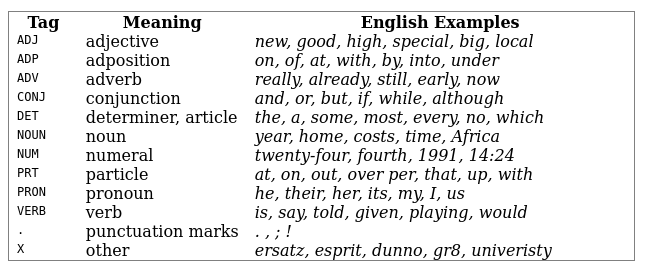

In [ ]:
nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(tokens)
tagged